In [1]:
from FlowCytometryTools import FCMeasurement, ThresholdGate, PolyGate, IntervalGate
from os.path import join
from pylab import *
import pandas as pd
import numpy as np
import itertools
import json

In [2]:
from anndata import AnnData
import os
from tifffile import imread, imwrite

In [3]:
import altair as alt
from altair_saver import save as alt_save

In [4]:
alt.data_transformers.disable_max_rows(); # Allow using rows more than 5000

# Lung sample 2.1

In [11]:
# https://eyurtsev.github.io/FlowCytometryTools/API/FlowCytometryTools.FCMeasurement.html#FlowCytometryTools.FCMeasurement

In [12]:
sample_id = "lung_2_1"

In [13]:
fc_file = join("data", sample_id, "flowcore", f"{sample_id}.fcs")
sample = FCMeasurement(ID=sample_id, datafile=fc_file)

In [14]:
sample.get_data()

,DAPI_1_cellMask,GFP.KP1.9_cellMask,CD206_cellMask,BODIPY630.NP_cellMask,DAPI_2_cellMask,Arg1_cellMask,CD11c_cellMask,CD45_cellMask,DAPI_3_cellMask,C12.D.nanoparticle_cellMask,...,Y_centroid,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,27958.554688,3295.222168,15162.777344,65415.890625,6190.000000,2957.000000,2229.000000,1074.000000,5538.000000,3251.000000,...,3.333333,61.444443,3.333333,9.0,4.277663,2.643019,0.786284,0.900000,0.750000,1.465250
1,27643.666016,3163.666748,6108.000000,5068.000000,6190.000000,2957.000000,2229.000000,1074.000000,5538.000000,3251.000000,...,2.666667,74.333336,2.666667,3.0,2.309401,1.333333,0.816497,1.000000,0.750000,-0.785398
2,27668.199219,4262.333496,10993.466797,8674.000000,6190.000000,2957.000000,2229.000000,1074.000000,5538.000000,3251.000000,...,3.666667,94.800003,3.666667,15.0,5.162854,3.686981,0.700007,0.937500,0.750000,-1.092991
3,29898.636719,4334.818359,7998.272949,3248.000000,6190.000000,2957.000000,2229.000000,1074.000000,5538.000000,3251.000000,...,4.500000,133.272720,4.500000,22.0,5.752470,4.851514,0.537319,1.000000,0.733333,0.000000
4,28224.917969,3873.027100,9128.458984,11911.027344,6190.000000,2957.000000,2229.000000,1074.000000,5538.000000,3251.000000,...,5.027027,180.756760,5.027027,37.0,8.337326,6.135042,0.677142,0.902439,0.660714,-0.907621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3293,36091.300781,5474.600098,16194.200195,11559.500000,13305.599609,8223.599609,5027.600098,4544.200195,10655.099609,7277.899902,...,512.400024,281.799988,512.400024,10.0,5.005094,2.636102,0.850061,0.909091,0.666667,1.499848
3294,18681.666016,3787.666748,8530.000000,6028.000000,10525.666992,15584.333008,8158.333496,4937.000000,9555.000000,6923.000000,...,511.666656,289.666656,511.666656,3.0,2.309401,1.333333,0.816497,1.000000,0.750000,0.785398
3295,35929.117188,15670.412109,8508.293945,5574.764648,41932.175781,13976.235352,9362.176758,4531.000000,12122.882812,7729.823730,...,512.529419,371.058838,512.529419,17.0,6.061336,3.897564,0.765849,0.894737,0.708333,1.506388
3296,23039.544922,14052.636719,7526.272949,3141.363525,37297.726562,11241.818359,6875.090820,4532.818359,30919.818359,18914.908203,...,512.090881,381.363647,512.090881,11.0,4.346130,3.067356,0.708444,1.000000,0.916667,1.307763


In [15]:
print(sample.channel_names)

('DAPI_1_cellMask', 'GFP.KP1.9_cellMask', 'CD206_cellMask', 'BODIPY630.NP_cellMask', 'DAPI_2_cellMask', 'Arg1_cellMask', 'CD11c_cellMask', 'CD45_cellMask', 'DAPI_3_cellMask', 'C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask', 'G0.P5.nanoparticle_cellMask', 'X_centroid', 'Y_centroid', 'column_centroid', 'row_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation')


In [16]:
gates = {
    "lung_1_1": [
        {
            "gate": IntervalGate((0, 2000), "GFP.KP1.9_cellMask", 'in', name='GFP- Host'),
            "children": [
                {
                    "gate": IntervalGate((0, 500), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((500, 20000), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
        {
            "gate": IntervalGate((3000, 30000), "GFP.KP1.9_cellMask", 'in', name='GFP+ Tumor'),
            "children": [
                {
                    "gate": IntervalGate((0, 500), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((500, 20000), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
    ],
    "lung_2_1": [
        {
            "gate": IntervalGate((0, 9000), "GFP.KP1.9_cellMask", 'in', name='GFP- Host'),
            "children": [
                {
                    "gate": IntervalGate((0, 2500), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((2500, 10000), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
        {
            "gate": IntervalGate((16000, 50000), "GFP.KP1.9_cellMask", 'in', name='GFP+ Tumor'),
            "children": [
                {
                    "gate": IntervalGate((0, 2500), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((2500, 10000), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
    ],
    "lung_2_2": [
        {
            "gate": IntervalGate((0, 9000), "GFP.KP1.9_cellMask", 'in', name='GFP- Host'),
            "children": [
                {
                    "gate": IntervalGate((0, 190), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((190, 700), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
        {
            "gate": IntervalGate((12000, 50000), "GFP.KP1.9_cellMask", 'in', name='GFP+ Tumor'),
            "children": [
                {
                    "gate": IntervalGate((0, 220), "CD45_cellMask", 'in', name='CD45-'),
                    "children": [],
                },
                {
                    "gate": IntervalGate((220, 1000), "CD45_cellMask", 'in', name='CD45+'),
                    "children": [],
                },
            ]
        },
    ],
}

In [17]:
thresholds = {
    "lung_1_1": {
        "GFP-": {
            "CD206_cellMask": 500,
            "Arg1_cellMask": 3000,
            "CD11c_cellMask": 1000,
        },
        "GFP+": {
            "CD206_cellMask": 500,
            "Arg1_cellMask": 500,
            "CD11c_cellMask": 500,
        }
    },
    "lung_2_1": {
        "GFP-": {
            "CD206_cellMask": 19000,
            "Arg1_cellMask": 15000,
            "CD11c_cellMask": 10000,
        },
        "GFP+": {
            "CD206_cellMask": 13750,
            "Arg1_cellMask": 12500,
            "CD11c_cellMask": 9000,
        }
    },
    "lung_2_2": {
        "GFP-": {
            "CD206_cellMask": 15000,
            "Arg1_cellMask": 600,
            "CD11c_cellMask": 400,
        },
        "GFP+": {
            "CD206_cellMask": 14000,
            "Arg1_cellMask": 450,
            "CD11c_cellMask": 350,
        }
    },
}

conditions = list(itertools.product([False, True], repeat=3))
channels = ["CD206_cellMask", "CD11c_cellMask", "Arg1_cellMask"]

for gfp_i, gfp_state in enumerate(["GFP-", "GFP+"]):
    for cd45_i, cd45_state in enumerate(["CD45-", "CD45+"]):
        for condition in conditions:
            condition_state = dict(zip(channels, condition))
            condition_name = "".join([ c_name.replace("_cellMask", "") + ("+" if c_val else "-") for c_name, c_val in condition_state.items() ])
            
            condition_gates = []
            for condition_channel, condition_value in condition_state.items():
                condition_gate = ThresholdGate(thresholds[sample_id][gfp_state][condition_channel], condition_channel, ("above" if condition_value else "below"), )
                condition_gates.append(condition_gate)
                
            gates[sample_id][gfp_i]["children"][cd45_i]["children"].append({
                "gate": condition_name,
                "children": condition_gates
            })

In [18]:
df = sample.get_data()
df.head()

,DAPI_1_cellMask,GFP.KP1.9_cellMask,CD206_cellMask,BODIPY630.NP_cellMask,DAPI_2_cellMask,Arg1_cellMask,CD11c_cellMask,CD45_cellMask,DAPI_3_cellMask,C12.D.nanoparticle_cellMask,...,Y_centroid,column_centroid,row_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation
0,27958.554688,3295.222168,15162.777344,65415.890625,6190.0,2957.0,2229.0,1074.0,5538.0,3251.0,...,3.333333,61.444443,3.333333,9.0,4.277663,2.643019,0.786284,0.900000,0.750000,1.465250
1,27643.666016,3163.666748,6108.000000,5068.000000,6190.0,2957.0,2229.0,1074.0,5538.0,3251.0,...,2.666667,74.333336,2.666667,3.0,2.309401,1.333333,0.816497,1.000000,0.750000,-0.785398
2,27668.199219,4262.333496,10993.466797,8674.000000,6190.0,2957.0,2229.0,1074.0,5538.0,3251.0,...,3.666667,94.800003,3.666667,15.0,5.162854,3.686981,0.700007,0.937500,0.750000,-1.092991
3,29898.636719,4334.818359,7998.272949,3248.000000,6190.0,2957.0,2229.0,1074.0,5538.0,3251.0,...,4.500000,133.272720,4.500000,22.0,5.752470,4.851514,0.537319,1.000000,0.733333,0.000000
4,28224.917969,3873.027100,9128.458984,11911.027344,6190.0,2957.0,2229.0,1074.0,5538.0,3251.0,...,5.027027,180.756760,5.027027,37.0,8.337326,6.135042,0.677142,0.902439,0.660714,-0.907621


In [19]:
# Prepare cells.json for Vitessce

In [20]:
cells_json = {}
for cell_id in df.index.values.tolist():
    row = df.loc[cell_id]
    cells_json[cell_id] = {
        "mappings": {
            
        },
        "xy": [ float(row["X_centroid"]), float(row["Y_centroid"]) ],
        "factors": {
            
        },
    }
with open(join("data", sample_id, "flowcore", f"{sample_id}.cells.json"), "w") as f:
    json.dump(cells_json, f)

In [21]:
# Prepare cell-sets.json for vitessce

In [22]:
cell_sets_json = {
    "version": "0.1.2",
    "datatype": "cell",
    "tree": [
        {
            "name": "Cell class",
            "children": [
                # GFP+
                # GFP-
            ]
        }
    ]
}

In [23]:
sample_gates = gates[sample_id]

for lev_0_node in sample_gates:
    lev_0_gate = lev_0_node["gate"]
    lev_0_gated_sample = sample.gate(lev_0_gate)
    
    lev_0_cs_node = {
        "name": lev_0_gate.name,
        "children": []
    }
    
    for lev_1_node in lev_0_node["children"]:
        lev_1_gate = lev_1_node["gate"]
        lev_1_gated_sample = lev_0_gated_sample.gate(lev_1_gate)
        
        lev_1_cs_node = {
            "name": lev_1_gate.name,
            "children": []
        }
        
        for lev_2_node in lev_1_node["children"]:
            lev_2_gated_sample = lev_1_gated_sample
            for lev_2_gate in lev_2_node["children"]:
                lev_2_gated_sample = lev_2_gated_sample.gate(lev_2_gate)
            
            lev_2_cs_node = {
                "name": lev_2_node["gate"],
                "set": [ str(i) for i in lev_2_gated_sample.get_data().index.values.tolist() ],
            }
            
            lev_1_cs_node["children"].append(lev_2_cs_node)
        
        lev_0_cs_node["children"].append(lev_1_cs_node)
    
    cell_sets_json["tree"][0]["children"].append(lev_0_cs_node)

In [24]:
with open(join("data", sample_id, "flowcore", f"{sample_id}.cell-sets.json"), "w") as f:
    json.dump(cell_sets_json, f)

## Generate gating plots

## Generate cell segmentation mask arrays and files

In [32]:
def get_sample_cell_ids(s):
    return [ str(i) for i in s.get_data().index.values.tolist() ]

In [33]:
segmentation_masks = {}

cell_class_df = pd.DataFrame(index=get_sample_cell_ids(sample), columns=[], data=[])

for lev_0_node in sample_gates:
    lev_0_gate = lev_0_node["gate"]
    lev_0_gated_sample = sample.gate(lev_0_gate)
    
    lev_0_cs_name = lev_0_gate.name
    
    for lev_1_node in lev_0_node["children"]:
        lev_1_gate = lev_1_node["gate"]
        lev_1_gated_sample = lev_0_gated_sample.gate(lev_1_gate)
        
        lev_1_cs_name = lev_1_gate.name
        lev_1_cs_set = get_sample_cell_ids(lev_1_gated_sample)
        
        set_name = f"{lev_0_cs_name} {lev_1_cs_name}"
        
       
        cell_class_df[set_name] = cell_class_df.index.to_series().apply(lambda i: i in lev_1_cs_set)
        
        

In [37]:
cell_class_df.head()

,GFP- Host CD45-,GFP- Host CD45+,GFP+ Tumor CD45-,GFP+ Tumor CD45+
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


In [38]:
image = imread(join("data", sample_id, "segmentation", f"unmicst-{sample_id}", "cellMask.tif"))

In [39]:
np.unique(image)

array([   0,    1,    2, ..., 3296, 3297, 3298], dtype=int32)

In [40]:
os.makedirs(join("data", sample_id, "masks"), exist_ok=True)

In [41]:
colors = [
    [57, 119, 175],
    [239, 133, 54],
    [81, 157, 62],
    [197, 57, 50],
    [141, 107, 184],
    [133, 88, 78],
    [227, 119, 194],
    [188, 189, 34]
]

In [44]:
rgb_image = np.zeros((*image.shape, 3))
int_image = np.zeros((*image.shape, ))
cell_classes = cell_class_df.columns.values.tolist()

for i, cell_class in enumerate(cell_classes):
    class_specific_df = cell_class_df.loc[(cell_class_df[cell_class])]

    in_cell_ids = [ (int(i)+1) for i in class_specific_df.index.values.tolist() ]
    for cell_id in in_cell_ids:
        rgb_image[image == cell_id] = colors[i]
        int_image[image == cell_id] = i

imwrite(join("data", sample_id, "masks", f"four__rgb.tif"), rgb_image, photometric='rgb')

In [50]:
int_image[90:100, 90:100]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
#######
# below is old
######

In [88]:
gfp_pos_gate = IntervalGate((16000, 50000), "GFP.KP1.9_cellMask", 'in', name='GFP+ Tumor')
gfp_pos_cd45_pos_gate = IntervalGate((2500, 10000), "CD45_cellMask", 'in', name='CD45+')
gfp_pos_cd45_neg_gate = IntervalGate((0, 2500), "CD45_cellMask", 'in', name='CD45-')

gfp_neg_gate = IntervalGate((0, 9000), "GFP.KP1.9_cellMask", 'in', name='GFP- Host')
gfp_neg_cd45_pos_gate = IntervalGate((2500, 10000), "CD45_cellMask", 'in', name='CD45+')
gfp_neg_cd45_neg_gate = IntervalGate((0, 2500), "CD45_cellMask", 'in', name='CD45-')


gfp_pos_gated_sample = sample.gate(gfp_pos_gate)
gfp_pos_cd45_pos_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_pos_gate)
gfp_pos_cd45_neg_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_neg_gate)

gfp_neg_gated_sample = sample.gate(gfp_neg_gate)
gfp_neg_cd45_pos_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_pos_gate)
gfp_neg_cd45_neg_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_neg_gate)

In [11]:
gfp_pos_gate.vert

(16000, 50000)

In [9]:
thresholds = {
    "GFP-": {
        "CD206_cellMask": 19000,
        "Arg1_cellMask": 15000,
        "CD11c_cellMask": 10000,
    },
    "GFP+": {
        "CD206_cellMask": 13750,
        "Arg1_cellMask": 12500,
        "CD11c_cellMask": 9000,
    },
}

gated_samples = {
    "GFP+": gfp_pos_gated_sample,
    "GFP+/CD45+": gfp_pos_cd45_pos_gated_sample,
    "GFP+/CD45-": gfp_pos_cd45_neg_gated_sample,
    "GFP-": gfp_neg_gated_sample,
    "GFP-/CD45+": gfp_neg_cd45_pos_gated_sample,
    "GFP-/CD45-": gfp_neg_cd45_neg_gated_sample,
}

In [10]:
conditions = list(itertools.product([False, True], repeat=3))
channels = ["CD206_cellMask", "CD11c_cellMask", "Arg1_cellMask"]

gated_sample_df = pd.DataFrame(data=[], index=[], columns=["gated_sample"])

for gated_sample_name, gated_sample in gated_samples.items():
    
    condition_gated_df = pd.DataFrame(index=sample.get_data().index.values.tolist(), columns=[], data=[])
    
    for condition in conditions:
        condition_state = dict(zip(channels, condition))
        condition_name = "".join([ c_name.replace("_cellMask", "") + ("+" if c_val else "-") for c_name, c_val in condition_state.items() ])
        condition_gated_sample = gated_sample
        
        for condition_channel, condition_value in condition_state.items():
            condition_gate = ThresholdGate(thresholds[gated_sample_name[:4]][condition_channel], condition_channel, ("above" if condition_value else "below"), )
            condition_gated_sample = condition_gated_sample.gate(condition_gate)
            
        condition_cells = condition_gated_sample.get_data().index.values.tolist()
        condition_gated_df[condition_name] = condition_gated_df.index.to_series().apply(lambda i: i in condition_cells)
    
    condition_gated_df.index = condition_gated_df.index.rename("cell_id")
        
    condition_gated_df["gated_sample"] = gated_sample_name
    condition_gated_df = condition_gated_df.reset_index()
    
    gated_sample_df = gated_sample_df.append(condition_gated_df, ignore_index=True)

In [11]:
gated_sample_df.head()

,gated_sample,cell_id,CD206-CD11c-Arg1-,CD206-CD11c-Arg1+,CD206-CD11c+Arg1-,CD206-CD11c+Arg1+,CD206+CD11c-Arg1-,CD206+CD11c-Arg1+,CD206+CD11c+Arg1-,CD206+CD11c+Arg1+
0,GFP+,0.0,False,False,False,False,False,False,False,False
1,GFP+,1.0,False,False,False,False,False,False,False,False
2,GFP+,2.0,False,False,False,False,False,False,False,False
3,GFP+,3.0,False,False,False,False,False,False,False,False
4,GFP+,4.0,False,False,False,False,False,False,False,False


In [12]:
gated_sample_df.to_csv(join("data", sample_id, "flowcore", f"{sample_id}.eight_classes.csv"))

In [42]:
gfp_pos_gate = PolyGate([(20000, 16000), (62000, 16000), (62000, 50000), (20000, 50000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP+ Tumor')
gfp_neg_gate = PolyGate([(20000, 0), (60000, 0), (60000, 9000), (20000, 9000)], channels=['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], region='in', name='GFP- Host')

# Host (slide 1)
gfp_neg_cd45_pos_cd206_pos_gate = PolyGate([(2500, 19000), (10000, 19000), (10000, 35000), (2500, 35000)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45+CD206+')
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate = PolyGate([(15000, 10000), (30000, 10000), (30000, 20000), (15000, 20000)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c+Arg1+')

# Tumor (slide 2)
gfp_pos_cd45_neg_cd206_neg_gate = PolyGate([(0, 0), (7000, 0), (7000, 13750), (0, 13750)], channels=['CD45_cellMask', 'CD206_cellMask'], region='in', name='CD45-CD206-')
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate = PolyGate([(2500, 0), (12500, 0), (12500, 9000), (2500, 9000)], channels=['Arg1_cellMask', 'CD11c_cellMask'], region='in', name='CD11c-Arg1-')

In [10]:
figure();

<Figure size 432x288 with 0 Axes>

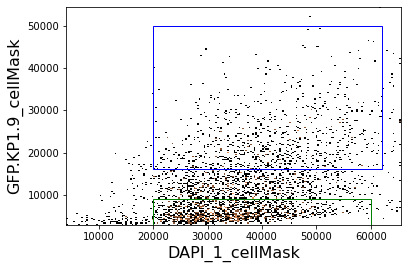

In [11]:
sample.plot(['DAPI_1_cellMask', 'GFP.KP1.9_cellMask'], gates=[gfp_pos_gate, gfp_neg_gate]);

In [12]:
gfp_pos_gated_sample = sample.gate(gfp_pos_gate)
gfp_neg_gated_sample = sample.gate(gfp_neg_gate)

In [13]:
gfp_neg_gated_sample.counts

1399

## GFP- Host

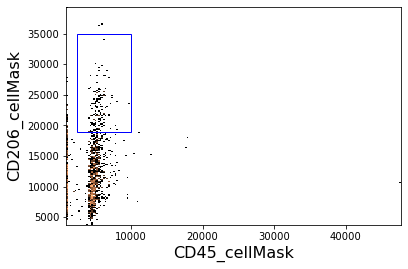

In [14]:
gfp_neg_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_gate]);

In [15]:
gfp_neg_cd45_pos_cd206_pos_gated_sample = gfp_neg_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_gate)

In [16]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.counts

136

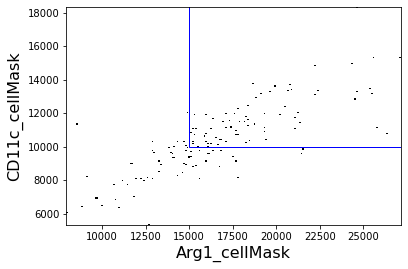

In [17]:
gfp_neg_cd45_pos_cd206_pos_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate]);

In [18]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample = gfp_neg_cd45_pos_cd206_pos_gated_sample.gate(gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gate)

In [19]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.counts

71

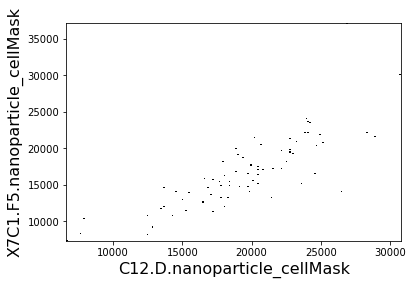

In [20]:
gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample.plot(['C12.D.nanoparticle_cellMask', 'X7C1.F5.nanoparticle_cellMask']);

## GFP+ Tumor

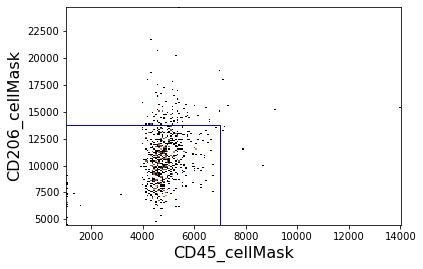

In [21]:
gfp_pos_gated_sample.plot(['CD45_cellMask', 'CD206_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_gate]);

In [22]:
gfp_pos_cd45_neg_cd206_neg_gated_sample = gfp_pos_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_gate)

In [23]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.counts

738

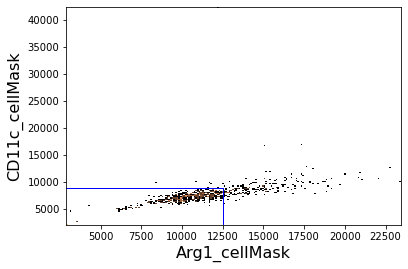

In [24]:
gfp_pos_cd45_neg_cd206_neg_gated_sample.plot(['Arg1_cellMask', 'CD11c_cellMask'], gates=[gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate]);

In [25]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample = gfp_pos_cd45_neg_cd206_neg_gated_sample.gate(gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gate)

In [26]:
gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample.counts

519

In [27]:
def classify_cells(sample, class_to_df):
    df = pd.DataFrame(index=sample.get_data().index.values.tolist(), columns=[], data=[])
    for cell_class_name, cell_class_sample in class_to_df.items():
        cells = cell_class_sample.get_data().index.values.tolist()
        df[cell_class_name] = df.index.to_series().apply(lambda i: i in cells)
    
    return df

In [28]:
df = classify_cells(sample, {
    "GFP-": gfp_neg_gated_sample,
    "GFP-/CD45+CD206+": gfp_neg_cd45_pos_cd206_pos_gated_sample,
    "GFP-/CD45+CD206+/CD11c+Arg1+": gfp_neg_cd45_pos_cd206_pos_cd11c_pos_arg1_pos_gated_sample,
    "GFP+": gfp_pos_gated_sample,
    "GFP+/CD45-CD206-": gfp_pos_cd45_neg_cd206_neg_gated_sample,
    "GFP+/CD45-CD206-/CD11c-Arg1-": gfp_pos_cd45_neg_cd206_neg_cd11c_neg_arg1_neg_gated_sample,
})

df.to_csv(join("data", sample_id, "flowcore", f"{sample_id}.classes.csv"), index=True)

In [29]:
writer = pd.ExcelWriter(join("data", sample_id, "flowcore", f"{sample_id}.classes.xlsx"))

for col in df.columns.values.tolist():
    sample.get_data().loc[df[col]].to_excel(writer, sheet_name=col.replace("/", " "))

writer.save()